In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np

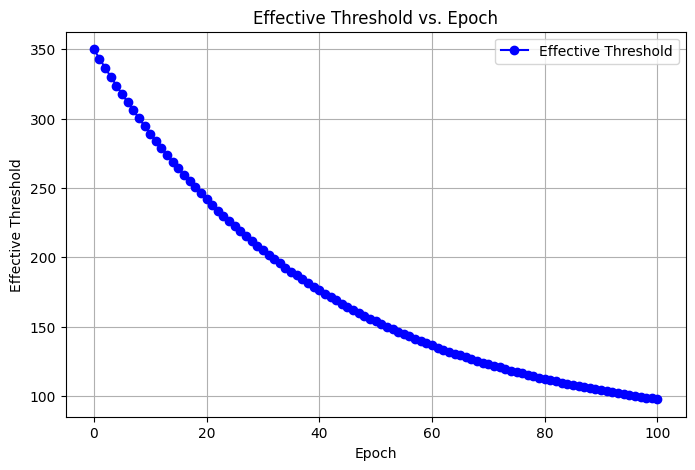

In [12]:
def plot_effective_threshold(upper_threshold=350, 
                             min_threshold=75, 
                             decay_rate =2.5,    # adjust as needed; higher values decay faster
                             total_epoches=100):
    """
    Plots the effective threshold as a function of epoch using an exponential decay formula.
    
    The formula is:
    
      effective_threshold = (upper_threshold - min_threshold) * exp(-decay_rate * (epoch / total_epoches)) + min_threshold
    
    Parameters:
        upper_threshold (float): The starting threshold at epoch 0.
        min_threshold (float): The minimum threshold that the function approaches.
        decay_rate (float): The decay rate controlling how quickly the threshold drops.
        total_epoches (int): The total number of epochs; used to normalize the epoch value.
    """
    # Generate array of epoch values from 0 to total_epoches
    epochs = np.arange(0, total_epoches + 1)
    
    # Compute effective threshold for each epoch
    effective_thresholds = [
        (upper_threshold - min_threshold) * math.exp(-decay_rate * (epoch / total_epoches)) + min_threshold 
        for epoch in epochs
    ]
    
    
    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, effective_thresholds, marker='o', linestyle='-', color='blue', label='Effective Threshold')
    plt.xlabel('Epoch')
    plt.ylabel('Effective Threshold')
    plt.title('Effective Threshold vs. Epoch')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
plot_effective_threshold()


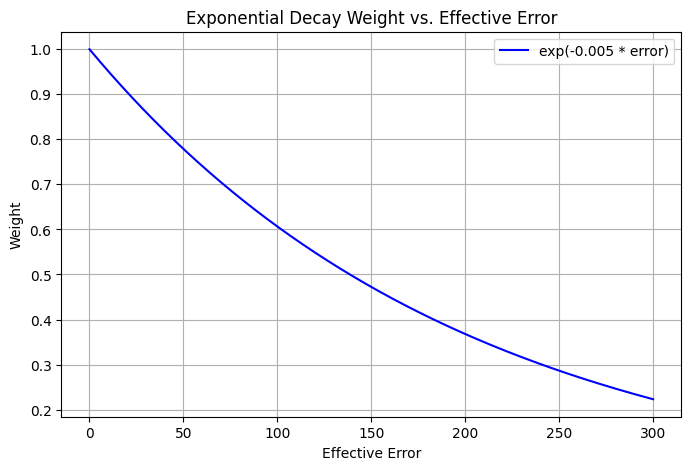

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_exponential_decay(decay_rate2=0.005, max_effective_error=300, num_points=1000):
    """
    Plots the function w(e) = exp(-decay_rate2 * e) over a range of effective error values.
    
    Args:
        decay_rate2 (float): Decay rate applied in the exponential. Default is 0.0075.
        max_effective_error (float): Maximum effective error value to consider. Default is 300.
        num_points (int): Number of points in the range to plot. Default is 1000.
    """
    # Generate a range of effective error values from 0 to max_effective_error.
    effective_error_values = np.linspace(0, max_effective_error, num_points)
    
    # Compute the exponential decay weight for each effective error value.
    # You can use torch.exp for this computation:
    effective_error_tensor = torch.tensor(effective_error_values, dtype=torch.float32)
    weights = torch.exp(-decay_rate2 * effective_error_tensor).numpy()
    
    # Plotting using matplotlib:
    plt.figure(figsize=(8, 5))
    plt.plot(effective_error_values, weights, label=f'exp(-{decay_rate2} * error)', color='blue')
    plt.xlabel("Effective Error")
    plt.ylabel("Weight")
    plt.title("Exponential Decay Weight vs. Effective Error")
    plt.grid(True)
    plt.legend()
    plt.show()

# Run the plot function with default parameters
plot_exponential_decay()


<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kumar\AppData\Local\Temp\ipykernel_30760\1277935231.py:15: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Exponential Decay of $\delta$ over Epochs')


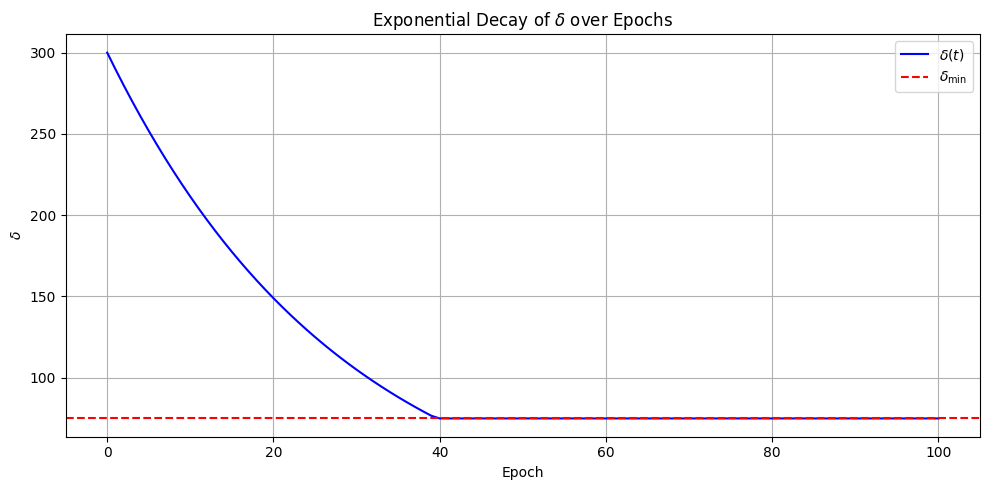

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import argparse

def delta(t, delta0, k, delta_min):
    return np.maximum(delta_min, delta0 * np.exp(-k * t))

def plot_delta_decay(delta0=300, k=0.035, delta_min=75, num_epochs=100):
    t = np.arange(num_epochs + 1)
    delta_values = delta(t, delta0, k, delta_min)

    plt.figure(figsize=(10, 5))
    plt.plot(t, delta_values, label=r'$\delta(t)$', color='blue')
    plt.axhline(y=delta_min, color='red', linestyle='--', label=r'$\delta_{\min}$')
    plt.title('Exponential Decay of $\delta$ over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(r'$\delta$')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    plot_delta_decay()


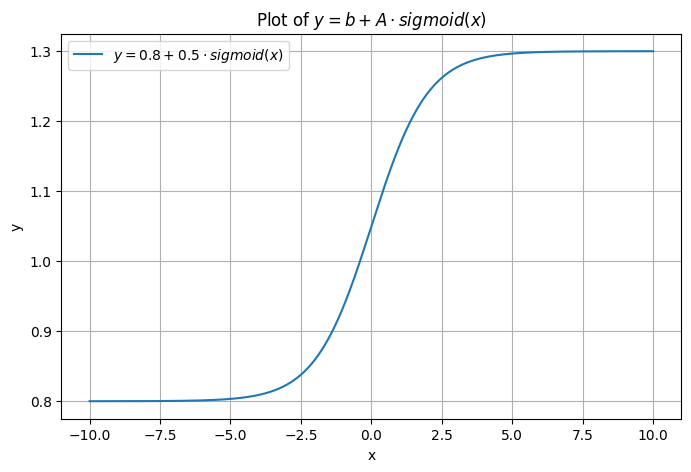

In [3]:
import torch
import matplotlib.pyplot as plt

def plot_transformed_sigmoid(A=0.5, b=0.8, x_min=-10, x_max=10, num_points=1000):
    # Create a tensor of x values
    x = torch.linspace(x_min, x_max, num_points)
    
    # Compute the transformed sigmoid: b + A * sigmoid(x)
    y = b + A * torch.sigmoid(x)
    
    # Plot the function
    plt.figure(figsize=(8, 5))
    plt.plot(x.numpy(), y.numpy(), label=f'$y = {b} + {A} \\cdot sigmoid(x)$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of $y = b + A \\cdot sigmoid(x)$')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
plot_transformed_sigmoid(A=0.5, b=0.8)


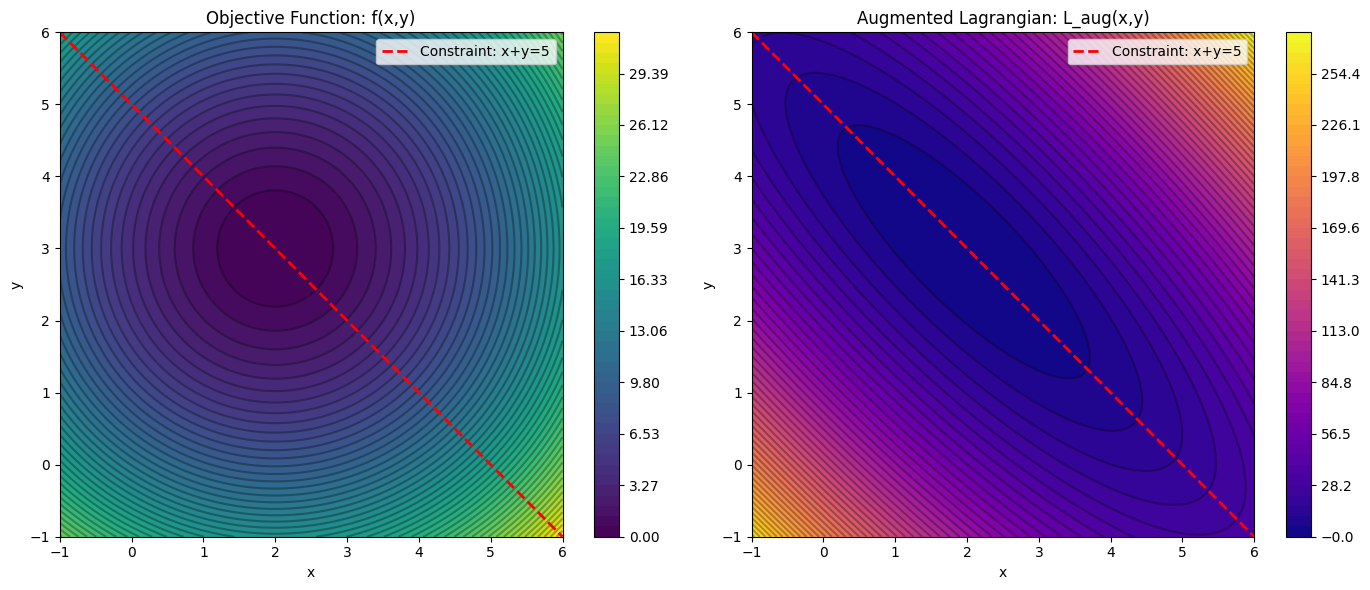

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original objective: a quadratic function.
# Example: f(x, y) = (x-2)^2 + (y-3)^2, which has a minimum at (2, 3)
def objective(x, y):
    return (x - 2)**2 + (y - 3)**2

# Define an equality constraint: d(x, y) = x + y - 5 = 0.
def constraint(x, y):
    return x + y - 5

# Augmented Lagrangian parameters:
# lambda is the Lagrange multiplier and rho is the penalty parameter.
lambda_val = 1.0  # initial guess for multiplier
rho = 10.0        # penalty parameter

# Define the augmented Lagrangian
# L_aug(x, y) = f(x,y) + lambda * d(x,y) + (rho/2) * (d(x,y))^2
def augmented_lagrangian(x, y, lambda_val, rho):
    d_val = constraint(x, y)
    return objective(x, y) + lambda_val * d_val + 0.5 * rho * d_val**2

# Create a grid of (x,y) values
x_vals = np.linspace(-1, 6, 200)
y_vals = np.linspace(-1, 6, 200)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the objective and augmented Lagrangian on the grid
Z_obj = objective(X, Y)
Z_aug = augmented_lagrangian(X, Y, lambda_val, rho)

# Set up the contour levels for clear visualization
obj_levels = np.linspace(np.min(Z_obj), np.max(Z_obj), 50)
aug_levels = np.linspace(np.min(Z_aug), np.max(Z_aug), 50)

# Create the contour plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the original objective function contours
cont1 = ax[0].contourf(X, Y, Z_obj, levels=obj_levels, cmap='viridis')
ax[0].contour(X, Y, Z_obj, levels=obj_levels, colors='black', alpha=0.3)
ax[0].set_title('Objective Function: f(x,y)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
# Also plot the constraint line: x+y-5 = 0  =>  y = 5 - x
ax[0].plot(x_vals, 5 - x_vals, 'r--', lw=2, label='Constraint: x+y=5')
ax[0].legend()
fig.colorbar(cont1, ax=ax[0])

# Plot the augmented Lagrangian contours
cont2 = ax[1].contourf(X, Y, Z_aug, levels=aug_levels, cmap='plasma')
ax[1].contour(X, Y, Z_aug, levels=aug_levels, colors='black', alpha=0.3)
ax[1].set_title('Augmented Lagrangian: L_aug(x,y)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
# Again, plot the constraint line
ax[1].plot(x_vals, 5 - x_vals, 'r--', lw=2, label='Constraint: x+y=5')
ax[1].legend()
fig.colorbar(cont2, ax=ax[1])

plt.tight_layout()
plt.show()


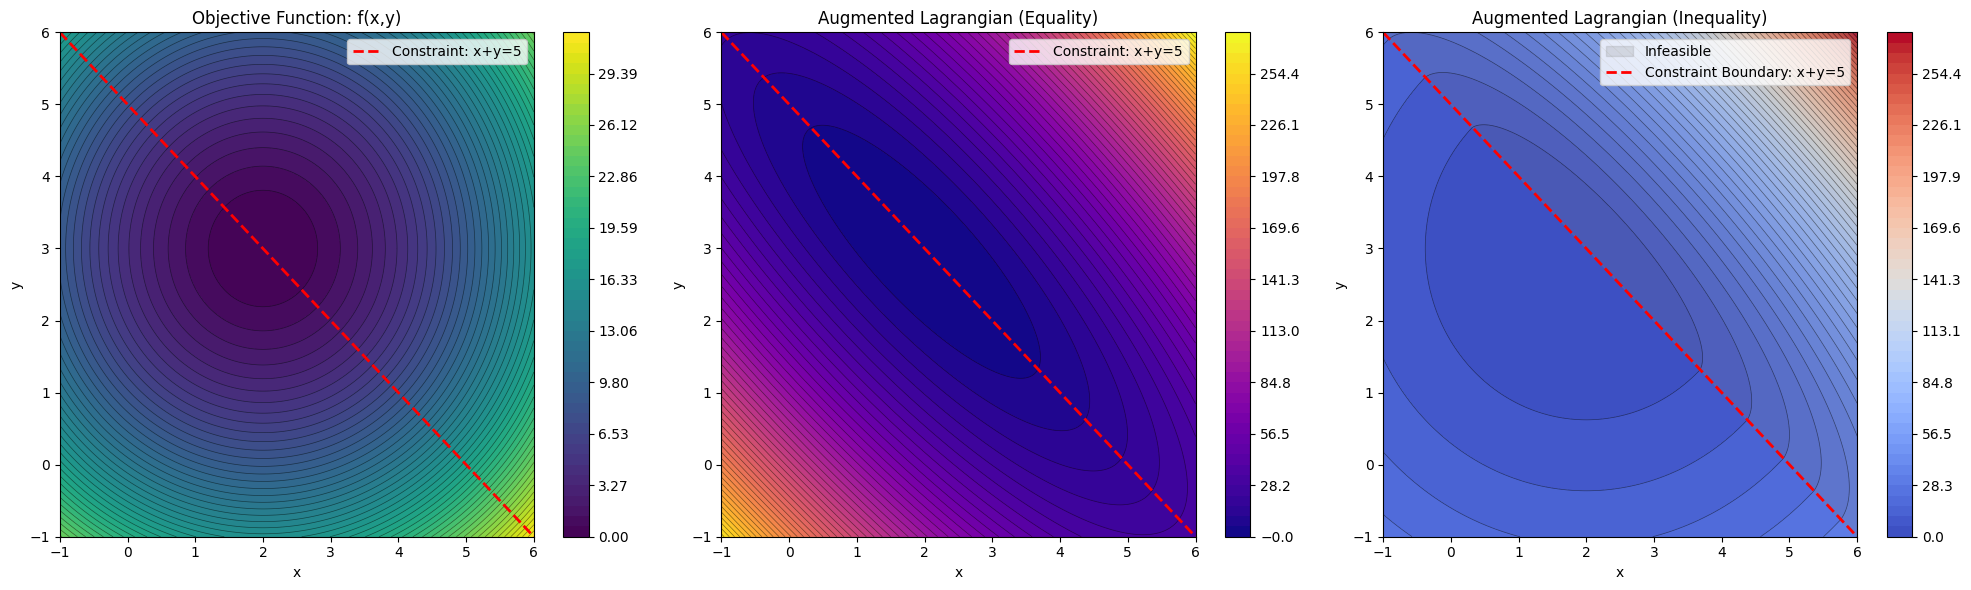

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original objective function:
# f(x, y) = (x - 2)^2 + (y - 3)^2, with a minimum at (2, 3)
def objective(x, y):
    return (x - 2)**2 + (y - 3)**2

# Define the constraint function common to both cases: x + y - 5.
# For the equality constraint, we want exactly x + y = 5.
# For the inequality constraint, we require x + y - 5 <= 0.
def constraint(x, y):
    return x + y - 5

# Augmented Lagrangian parameters
lambda_val = 1.0  # Lagrange multiplier (same for both cases in this toy example)
rho = 10.0        # Penalty parameter

# Augmented Lagrangian for the equality constraint:
# L_eq(x,y) = f(x,y) + lambda * d(x,y) + (rho/2)*(d(x,y))^2
def augmented_eq(x, y, lambda_val, rho):
    d_val = constraint(x, y)
    return objective(x, y) + lambda_val * d_val + 0.5 * rho * d_val**2

# Augmented Lagrangian for the inequality constraint:
# When c(x,y) <= 0 is satisfied, the penalty is zero.
# We define L_ineq(x,y) = f(x,y) + lambda * max(0, c(x,y)) + (rho/2)*max(0, c(x,y))^2
def augmented_ineq(x, y, lambda_val, rho):
    c_val = np.maximum(0, constraint(x, y))
    return objective(x, y) + lambda_val * c_val + 0.5 * rho * c_val**2

# Create a grid of (x,y) values
x_vals = np.linspace(-1, 6, 300)
y_vals = np.linspace(-1, 6, 300)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the original objective over the grid
Z_obj = objective(X, Y)
# Compute the augmented Lagrangians over the grid:
Z_eq  = augmented_eq(X, Y, lambda_val, rho)
Z_ineq = augmented_ineq(X, Y, lambda_val, rho)

# Set up common contour levels for clarity
levels_obj   = np.linspace(np.min(Z_obj), np.max(Z_obj), 50)
levels_eq    = np.linspace(np.min(Z_eq), np.max(Z_eq), 50)
levels_ineq  = np.linspace(np.min(Z_ineq), np.max(Z_ineq), 50)

# Create a plot with three subplots:
# (1) Original objective function,
# (2) Augmented Lagrangian with the equality constraint,
# (3) Augmented Lagrangian with the inequality constraint.
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# === Plot 1: Original Objective Function ===
cs1 = axs[0].contourf(X, Y, Z_obj, levels=levels_obj, cmap='viridis')
axs[0].contour(X, Y, Z_obj, levels=levels_obj, colors='black', linewidths=0.5, alpha=0.5)
axs[0].set_title('Objective Function: f(x,y)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
# Draw the constraint line: x+y=5 -> y = 5-x
axs[0].plot(x_vals, 5 - x_vals, 'r--', lw=2, label='Constraint: x+y=5')
axs[0].legend()
fig.colorbar(cs1, ax=axs[0])

# === Plot 2: Augmented Lagrangian for Equality Constraint ===
cs2 = axs[1].contourf(X, Y, Z_eq, levels=levels_eq, cmap='plasma')
axs[1].contour(X, Y, Z_eq, levels=levels_eq, colors='black', linewidths=0.5, alpha=0.5)
axs[1].set_title('Augmented Lagrangian (Equality)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
# Draw the constraint line
axs[1].plot(x_vals, 5 - x_vals, 'r--', lw=2, label='Constraint: x+y=5')
axs[1].legend()
fig.colorbar(cs2, ax=axs[1])

# === Plot 3: Augmented Lagrangian for Inequality Constraint ===
cs3 = axs[2].contourf(X, Y, Z_ineq, levels=levels_ineq, cmap='coolwarm')
axs[2].contour(X, Y, Z_ineq, levels=levels_ineq, colors='black', linewidths=0.5, alpha=0.5)
axs[2].set_title('Augmented Lagrangian (Inequality)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
# For the inequality, shade the feasible region (x+y <= 5)
feasible_x = np.linspace(-1, 6, 300)
feasible_y = 5 - feasible_x
axs[2].fill_between(feasible_x, feasible_y, 6, color='gray', alpha=0.2, label='Infeasible')
axs[2].plot(x_vals, 5 - x_vals, 'r--', lw=2, label='Constraint Boundary: x+y=5')
axs[2].legend()
fig.colorbar(cs3, ax=axs[2])

plt.tight_layout()
plt.show()


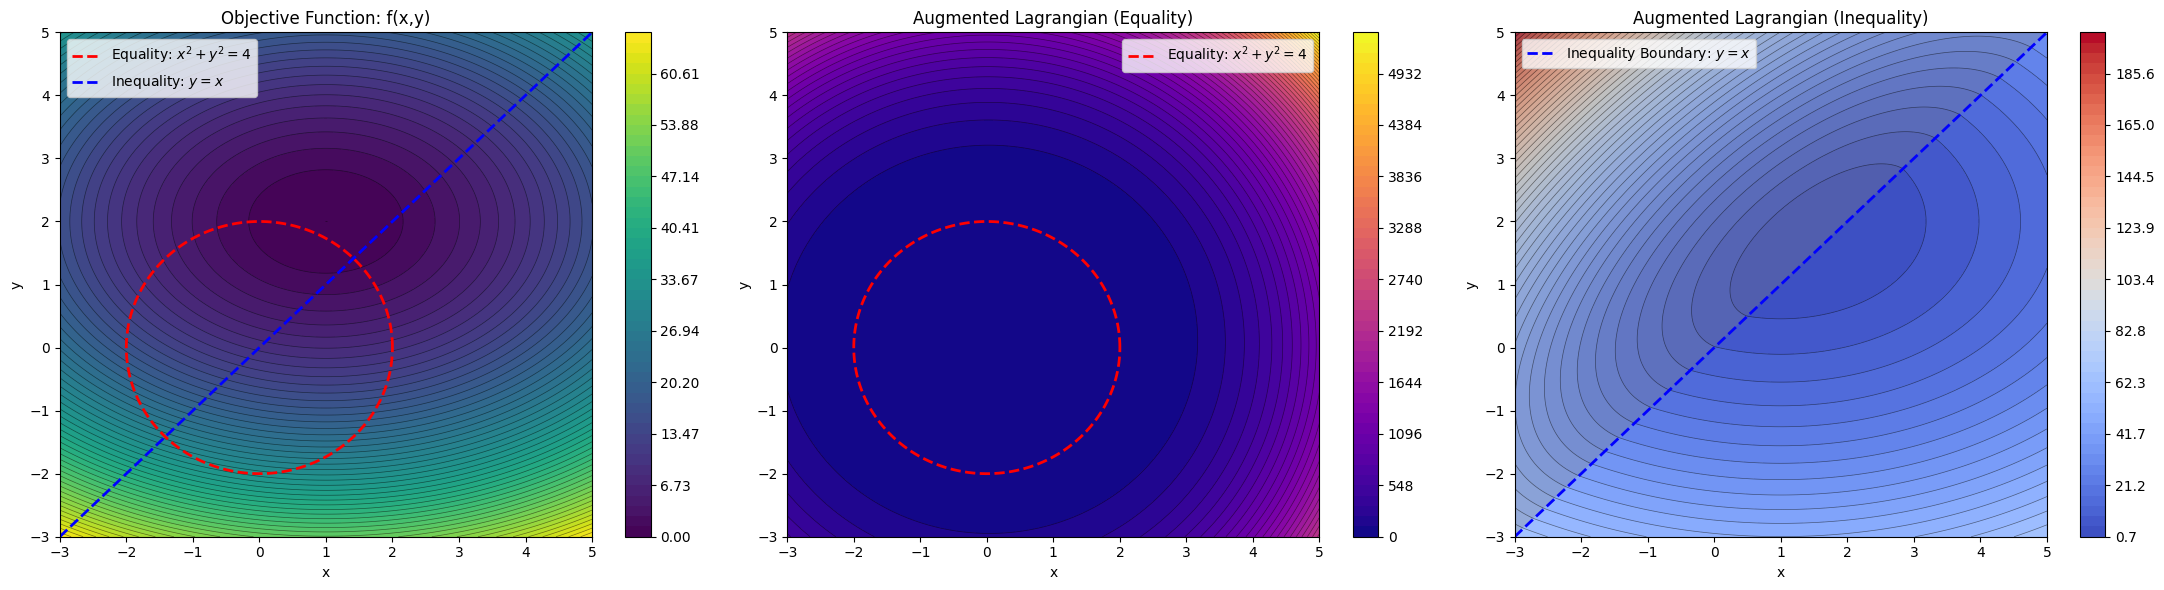

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# -- 1. Define the objective function --
def objective(x, y):
    # f(x,y) = (x - 1)^2 + 2*(y - 2)^2
    return (x - 1)**2 + 2 * (y - 2)**2

# -- 2. Define the new equality and inequality constraints --

# Equality constraint: x^2 + y^2 - 4 = 0 (circle of radius 2)
def equality_constraint(x, y):
    return x**2 + y**2 - 4

# Inequality constraint: y - x <= 0 (region below the line y = x)
def inequality_constraint(x, y):
    return y - x

# -- 3. Parameters for the augmented Lagrangian --
lambda_val = 1.0  # Lagrange multiplier (initial guess)
rho = 5.0        # Penalty parameter

# Augmented Lagrangian for equality constraint:
def augmented_eq(x, y, lambda_val, rho):
    d_val = equality_constraint(x, y)
    return objective(x, y) + lambda_val * d_val + 0.5 * rho * d_val**2

# Augmented Lagrangian for inequality constraint:
# Only penalize when inequality is violated (i.e. when y - x > 0)
def augmented_ineq(x, y, lambda_val, rho):
    c_val = np.maximum(0, inequality_constraint(x, y))
    return objective(x, y) + lambda_val * c_val + 0.5 * rho * c_val**2

# -- 4. Create a grid --
x_vals = np.linspace(-3, 5, 300)
y_vals = np.linspace(-3, 5, 300)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluate functions on the grid
Z_obj  = objective(X, Y)
Z_eq   = augmented_eq(X, Y, lambda_val, rho)
Z_ineq = augmented_ineq(X, Y, lambda_val, rho)

# Set contour levels
levels_obj  = np.linspace(np.min(Z_obj), np.max(Z_obj), 50)
levels_eq   = np.linspace(np.min(Z_eq), np.max(Z_eq), 50)
levels_ineq = np.linspace(np.min(Z_ineq), np.max(Z_ineq), 50)

# -- 5. Plotting --
fig, axs = plt.subplots(1, 3, figsize=(22, 6))

# Plot 1: Original Objective Function
cs1 = axs[0].contourf(X, Y, Z_obj, levels=levels_obj, cmap='viridis')
axs[0].contour(X, Y, Z_obj, levels=levels_obj, colors='black', linewidths=0.5, alpha=0.5)
axs[0].set_title('Objective Function: f(x,y)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
# Draw the equality constraint curve (circle: x^2+y^2=4)
theta = np.linspace(0, 2*np.pi, 200)
axs[0].plot(2*np.cos(theta), 2*np.sin(theta), 'r--', lw=2, label='Equality: $x^2+y^2=4$')
# Draw the inequality constraint line (y = x)
axs[0].plot(x_vals, x_vals, 'b--', lw=2, label='Inequality: $y=x$')
axs[0].legend()
fig.colorbar(cs1, ax=axs[0])

# Plot 2: Augmented Lagrangian (Equality Constraint)
cs2 = axs[1].contourf(X, Y, Z_eq, levels=levels_eq, cmap='plasma')
axs[1].contour(X, Y, Z_eq, levels=levels_eq, colors='black', linewidths=0.5, alpha=0.5)
axs[1].set_title('Augmented Lagrangian (Equality)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
# Plot the equality constraint (circle) in red dashed
axs[1].plot(2*np.cos(theta), 2*np.sin(theta), 'r--', lw=2, label='Equality: $x^2+y^2=4$')
axs[1].legend()
fig.colorbar(cs2, ax=axs[1])

# Plot 3: Augmented Lagrangian (Inequality Constraint)
cs3 = axs[2].contourf(X, Y, Z_ineq, levels=levels_ineq, cmap='coolwarm')
axs[2].contour(X, Y, Z_ineq, levels=levels_ineq, colors='black', linewidths=0.5, alpha=0.5)
axs[2].set_title('Augmented Lagrangian (Inequality)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
# Draw the inequality constraint line: y = x, as the boundary
axs[2].plot(x_vals, x_vals, 'b--', lw=2, label='Inequality Boundary: $y=x$')
# Highlight the infeasible area: where y - x > 0 (above the line y = x)
infeasible_mask = inequality_constraint(X, Y) > 0
axs[2].contourf(X, Y, infeasible_mask, levels=[0.5, 1], colors='gray', alpha=0.3, antialiased=True)
axs[2].legend()
fig.colorbar(cs3, ax=axs[2])

plt.tight_layout()
plt.show()


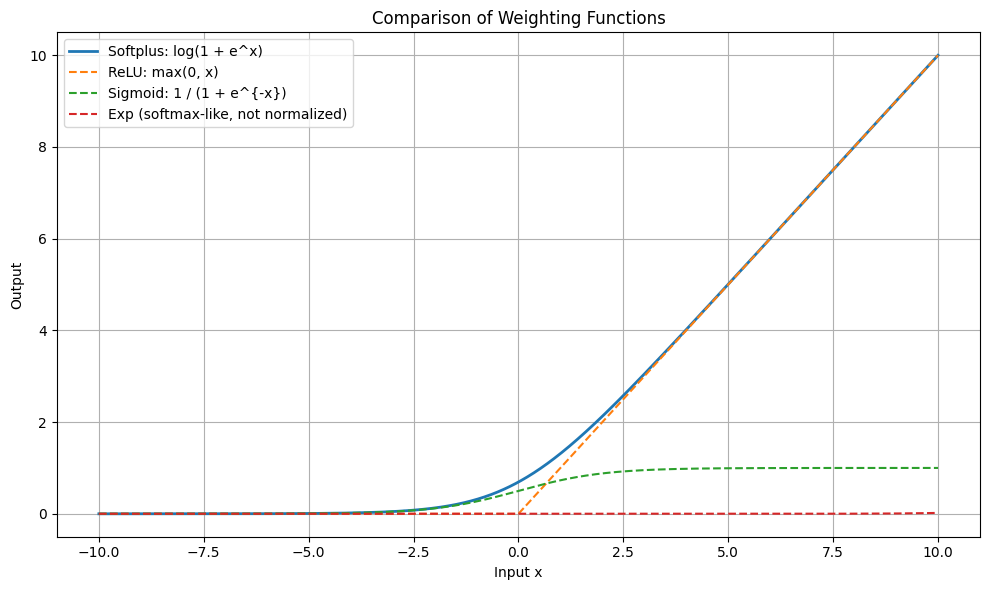

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x = torch.linspace(-10, 10, 1000)

# Different weighting functions
softplus = torch.nn.functional.softplus(x)
relu = torch.nn.functional.relu(x)
sigmoid = torch.sigmoid(x)
softmax_like = torch.exp(x) / torch.sum(torch.exp(x))  # Not normalized over axis, just shape

# Convert to NumPy for plotting
x_np = x.numpy()
softplus_np = softplus.numpy()
relu_np = relu.numpy()
sigmoid_np = sigmoid.numpy()
softmax_np = softmax_like.numpy()

plt.figure(figsize=(10, 6))

plt.plot(x_np, softplus_np, label="Softplus: log(1 + e^x)", linewidth=2)
plt.plot(x_np, relu_np, '--', label="ReLU: max(0, x)")
plt.plot(x_np, sigmoid_np, '--', label="Sigmoid: 1 / (1 + e^{-x})")
plt.plot(x_np, softmax_np, '--', label="Exp (softmax-like, not normalized)")

plt.title("Comparison of Weighting Functions")
plt.xlabel("Input x")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


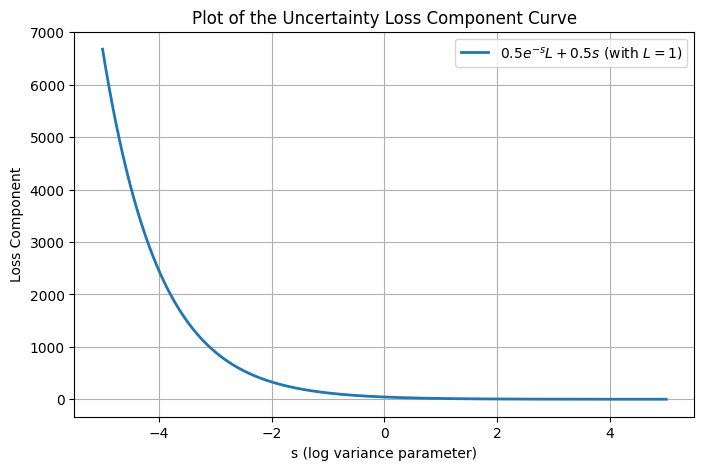

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of s values
s = np.linspace(-5, 5, 500)

# Set a constant task loss L.
L = 90

# Compute the uncertainty-based loss term for each s.
loss_component = 0.5 * np.exp(-s) * L + 0.5 * s

# Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(s, loss_component, label=r"$0.5e^{-s}L + 0.5s$ (with $L=1$)", linewidth=2)
plt.xlabel("s (log variance parameter)")
plt.ylabel("Loss Component")
plt.title("Plot of the Uncertainty Loss Component Curve")
plt.grid(True)
plt.legend()
plt.show()
